In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel("employes_dataset.xlsx")  

In [5]:

display(df.head(10))

,ID,Nom,Prénom,Âge,Sexe,Email,Pays,Ville,Salaire (€),Date d'embauche,Département,Télétravail (%),Performance (Note)
0,1,Richard,Stacey,62,Homme,lgonzalez@crawford.org,Trinidad and Tobago,New Devinview,54564.0,2023-09-30,Finance,0.0,2.0
1,2,Chang,Loretta,65,Homme,rebeccabrown@hotmail.com,Netherlands,Lake Rebecca,23393.0,2023-10-14,Informatique,0.0,2.0
2,3,Fisher,Kimberly,18,Homme,waynebarnes@schultz-sims.org,Oman,Alexanderfort,62711.0,2017-08-24,Finance,60.0,1.0
3,4,Green,Julie,21,Homme,morgandevon@burgess.com,Moldova,Alexanderville,52274.0,2022-06-09,RH,100.0,1.0
4,5,Dixon,Jacob,21,Homme,elliskaren@gmail.com,Dominican Republic,East Darren,108305.0,2018-08-02,Informatique,0.0,3.0
5,6,Sullivan,Ana,57,Femme,afranklin@hotmail.com,Iceland,South Benjamin,33920.0,2019-05-26,RH,20.0,4.0
6,7,Bowers,Rodney,27,Femme,rmiranda@hess.com,Congo,Dawsonland,98086.0,2016-09-28,RH,20.0,4.0
7,8,Turner,Stephanie,37,Homme,uphillips@cohen.com,Palau,West Tiffany,25213.0,2024-06-07,Logistique,NaN,4.0
8,9,Woods,Glenn,39,Homme,reidwilliam@hotmail.com,Slovakia (Slovak Republic),New Jessica,51914.0,2025-03-06,Production,40.0,1.0
9,10,Silva,Geoffrey,68,Homme,williamsalexis@beasley.biz,Hungary,Lake Rebecca,119041.0,2024-12-27,Finance,80.0,5.0


In [6]:

print(df.columns.tolist())

['ID', 'Nom', 'Prénom', 'Âge', 'Sexe', 'Email', 'Pays', 'Ville', 'Salaire (€)', "Date d'embauche", 'Département', 'Télétravail (%)', 'Performance (Note)']


In [7]:


print(df['Sexe'].value_counts())

Sexe
Femme    513
Homme    487
Name: count, dtype: int64


In [8]:


print(df['Pays'].value_counts().head(5))

Pays
Congo          10
Tajikistan     10
Finland        10
Madagascar     10
New Zealand    10
Name: count, dtype: int64


In [ ]:
salaires = df['Salaire (€)'].dropna()
print("\n Statistiques sur les salaires (€) :")
print(f"- Moyenne : {np.mean(salaires):,.2f} €")
print(f"- Médiane : {np.median(salaires):,.2f} €")
print(f"- Minimum : {np.min(salaires):,.2f} €")
print(f"- Maximum : {np.max(salaires):,.2f} €")
print(f"- Écart-type : {np.std(salaires):,.2f} €")


5. Statistiques sur les salaires (€) :
- Moyenne : 69,101.74 €
- Médiane : 69,518.50 €
- Minimum : 18,107.00 €
- Maximum : 119,836.00 €
- Écart-type : 29,703.03 €


In [ ]:
print("\n Âge moyen par département :")
print(df.groupby('Département')['Âge'].mean())


 Statistiques sur les salaires :
Département
Finance         42.560694
Informatique    43.681529
Logistique      41.757764
Marketing       43.187500
Production      44.198795
RH              44.131148
Name: Âge, dtype: float64


In [13]:
print("\n la ville ayant le plus grand nombre d’employés :")
ville_plus_grand_employe=df['Ville'].value_counts().idxmax()
new_ville_plus_grand_employe=df['Ville'].value_counts().max()
print(f"{ville_plus_grand_employe} avec {new_ville_plus_grand_employe} employés ")


 la ville ayant le plus grand nombre d’employés :
Lake Daniel avec 2 employés 



10. Distribution des âges :


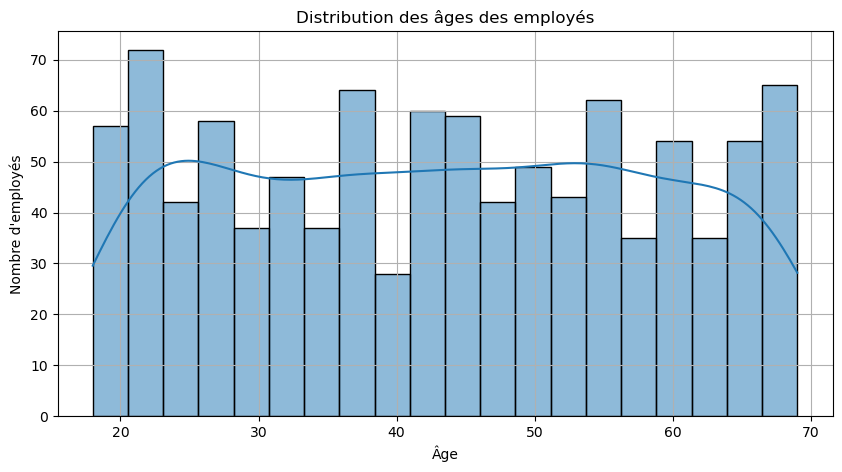

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n10. Distribution des âges :")
plt.figure(figsize=(10, 5))
sns.histplot(df['Âge'], bins=20, kde=True)
plt.title("Distribution des âges des employés")
plt.xlabel("Âge")
plt.ylabel("Nombre d'employés")
plt.grid(True)
plt.show()

In [ ]:
# 11. Colonnes avec des valeurs manquantes
print("11. Colonnes avec des valeurs manquantes :")
print(df.isna().sum()[df.isna().sum() > 0])

In [ ]:
# 12. Remplacer les NaN de ‘Télétravail (%)’ par la moyenne
df['Télétravail (%)'].fillna(df['Télétravail (%)'].mean(), inplace=True)

In [ ]:
# 13. Remplacer les NaN de ‘Télétravail (%)’ par la moyenne par département
df['Télétravail (%)'] = df.groupby('Département')['Télétravail (%)'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# 14. Supprimer les lignes où ‘Performance (Note)’ est manquante
df = df.dropna(subset=['Performance (Note)'])

In [ ]:
# 15. Stratégie pour les NaN dans ‘Performance (Note)’ : ici on a supprimé — peut être remplacé par moyenne/mediane selon le cas

In [ ]:
# 16. Convertir ‘Date d’embauche’ en datetime
df['Date d'embauche'] = pd.to_datetime(df['Date d'embauche'])

In [ ]:
# 17. Créer une colonne ‘Ancienneté (années)’
df['Ancienneté (années)'] = (pd.to_datetime('today') - df['Date d'embauche']).dt.days // 365

In [ ]:
# 18. Supprimer les doublons
df = df.drop_duplicates()

In [ ]:
# 19. Uniformiser les majuscules
for col in ['Nom', 'Prénom', 'Ville', 'Pays']:
    df[col] = df[col].str.title()

In [ ]:
# 20. Vérifier les e-mails valides
df['Email valide'] = df['Email'].apply(lambda x: bool(re.match(r"[^@\s]+@[^@\s]+\.[a-zA-Z0-9]+$", str(x))))

In [ ]:
# 21. Supprimer les outliers sur Salaire avec IQR
Q1 = df['Salaire (€)'].quantile(0.25)
Q3 = df['Salaire (€)'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Salaire (€)'] >= Q1 - 1.5*IQR) & (df['Salaire (€)'] <= Q3 + 1.5*IQR)]

In [ ]:
# 22. Vérifier si distribution des âges suit une loi normale
stat, p = normaltest(df['Âge'])
print("\n22. Test de normalité sur l'âge :")
print("Statistique =", stat, "| p-value =", p)

In [ ]:
# 23. Créer une colonne ‘prime’
df['prime'] = np.where((df['Performance (Note)'] >= 4) & (df['Ancienneté (années)'] >= 5), 1000, 0)

In [ ]:
# 24. Encoder ‘Sexe’
df['Sexe_num'] = df['Sexe'].map({'Femme': 0, 'Homme': 1})

In [ ]:
# 25. Tranche d’âge
df['Tranche d’âge'] = pd.cut(df['Âge'], bins=[0, 25, 30, 40], labels=["0-25", "26-30", "31-40"])

In [ ]:
# 26. Ajouter une colonne de langages fictive et explode()
df['Langages'] = [["Python", "SQL"], ["R", "Tableau"], ["Java"], ["C++", "Python"]] + [np.nan]*(len(df)-4)
df = df.explode('Langages')

In [ ]:
# 27. MultiIndex avec stack/unstack
df_multi = df.set_index(['Département', 'Sexe']).sort_index()
df_stacked = df_multi.stack()
df_unstacked = df_multi.unstack()

In [ ]:
# 28. DataFrame des outliers Salaire avec IQR
outliers_df = df[(df['Salaire (€)'] < Q1 - 1.5*IQR) | (df['Salaire (€)'] > Q3 + 1.5*IQR)]

In [ ]:
# 29. Encoder ‘Département’ avec get_dummies()
df_encoded = pd.get_dummies(df, columns=['Département'])

In [ ]:
# 30. Ajouter une date fictive d’inscription
df['Date inscription'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')
df['Année'] = df['Date inscription'].dt.year
df['Mois'] = df['Date inscription'].dt.month

In [ ]:
# 31. Fonction personnalisée avec pipe()
def age_category(df):
    df['Catégorie Âge'] = df['Âge'].apply(lambda x: "Jeune" if x < 30 else "Adulte")
    return df

df = df.pipe(age_category)

In [ ]:
# 32. Barplot âge moyen par département
plt.figure(figsize=(10, 5))
sns.barplot(x='Département', y='Âge', data=df, estimator=np.mean)
plt.title("Âge moyen par département")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 33. Sauvegarder dans employes_nettoye.xlsx
df.to_excel("employes_nettoye.xlsx", index=False)

In [ ]:
# 34. Histogramme des âges
plt.figure()
df['Âge'].hist(bins=20)
plt.title("Histogramme des âges")
plt.xlabel("Âge")
plt.ylabel("Effectif")
plt.show()

In [ ]:
# 35. Barres : nombre d’employés par département
plt.figure()
df['Département'].value_counts().plot(kind='bar')
plt.title("Nombre d'employés par département")
plt.ylabel("Nombre")
plt.show()

In [ ]:
# 36. Camembert Hommes/Femmes
plt.figure()
df['Sexe'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Répartition Hommes/Femmes")
plt.ylabel("")
plt.show()

In [ ]:
# 37. Boxplot des salaires par département
plt.figure(figsize=(10, 5))
sns.boxplot(x='Département', y='Salaire (€)', data=df)
plt.title("Boxplot des salaires par département")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 38. Heatmap de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Âge', 'Salaire (€)', 'Performance (Note)', 'Télétravail (%)', 'Ancienneté (années)']].corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

In [ ]:
# 39. Courbe des embauches par année
df['Année embauche'] = df['Date d'embauche'].dt.year
embauche_par_annee = df['Année embauche'].value_counts().sort_index()
embauche_par_annee.plot(kind='line', marker='o')
plt.title("Évolution des embauches par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'embauches")
plt.grid(True)
plt.show()

In [ ]:
# 40. Graphique combiné : salaire & performance moyens par département
df_grouped = df.groupby('Département')[['Salaire (€)', 'Performance (Note)']].mean()
ax = df_grouped['Salaire (€)'].plot(kind='bar', figsize=(10,5), legend=True)
df_grouped['Performance (Note)'].plot(kind='line', marker='o', secondary_y=True, ax=ax)
plt.title("Salaire moyen et performance moyenne par département")
plt.show()

In [ ]:
# 41. KDE plot des salaires
plt.figure()
sns.kdeplot(df['Salaire (€)'], fill=True)
plt.title("Distribution des salaires (KDE)")
plt.xlabel("Salaire (€)")
plt.show()

In [ ]:
# 42. Heatmap nombre d’employés par pays et sexe
heatmap_data = df.pivot_table(index='Pays', columns='Sexe', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Nombre d'employés par pays et par sexe")
plt.show()

In [ ]:
# 43. Scatter plot : Âge vs Salaire coloré par Performance
plt.figure()
sns.scatterplot(x='Âge', y='Salaire (€)', hue='Performance (Note)', data=df, palette='viridis')
plt.title("Âge vs Salaire coloré par note de performance")
plt.show()

In [ ]:
#GIT DU PROF BeObm